# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Importing the dataset

In [2]:
df = pd.read_csv("dataframe_.csv")

In [3]:
df.shape

(1697, 2)

# Exploratory Data Analysis

In [4]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Here the maximum value is way bigger than the mean

## Removing the null values and handling the outliers

In [5]:
df.isnull().sum()

input     1
output    1
dtype: int64

We can see that there are some missing values in **input** and **output** feature. So let's impute these missing values.

In [6]:
df1 = df.dropna()
df1.isnull().sum()

input     0
output    0
dtype: int64

In [7]:
df1.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check if thers are any outliers using **boxplots**

<AxesSubplot: >

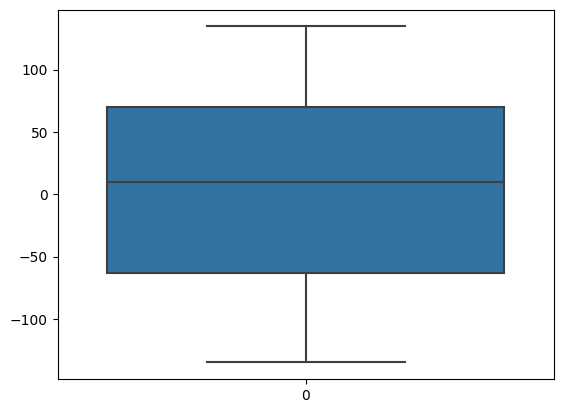

In [8]:
sns.boxplot(df1['input'])

<AxesSubplot: >

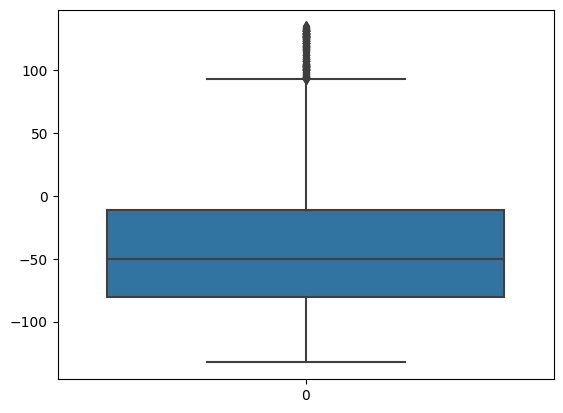

In [9]:
sns.boxplot(df1['output'])

Here we can see that there are outliers. So let us remove them.

In [10]:
df1['output'].quantile(0.999)

133.7931158

In [11]:
df2 = df1[df1['output'] <= 133]

In [12]:
df2.describe()

,input,output
count,1692.000000,1692.000000
mean,1.007186,-34.485147
std,78.878279,65.338826
min,-134.962839,-132.422167
25%,-63.386506,-80.031275
50%,10.008175,-50.576499
75%,70.029493,-11.383368
max,134.605775,132.424802


Let's check for outliers using boxplots

<AxesSubplot: >

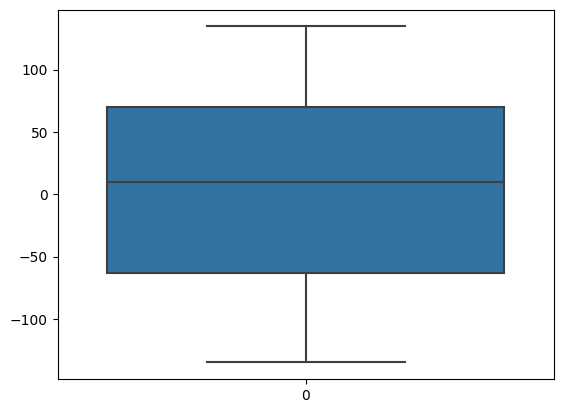

In [13]:
sns.boxplot(df2['input'])

<AxesSubplot: >

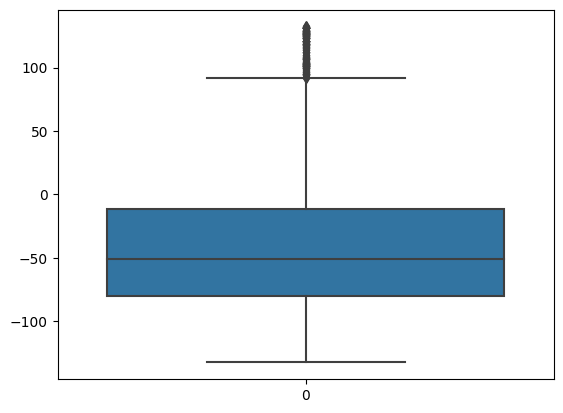

In [14]:
sns.boxplot(df2['output'])

we can see that there are no outliers in the data set

<AxesSubplot: xlabel='input', ylabel='output'>

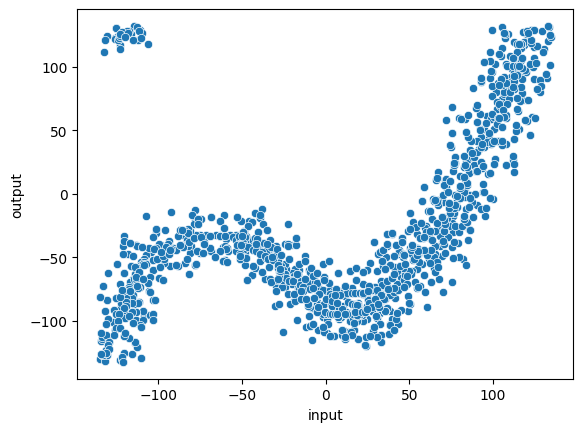

In [15]:
sns.scatterplot(x=df2['input'], y=df2['output'])

# Feature Engineering

In [16]:
X=df2[['input']]
y=df2[['output']]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [21]:
y_pred=lr.predict(X_test)

In [22]:
lr.score(X_train,y_train)

0.23642806954486628

In [23]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)

2843.744522440533


In [24]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

41.361423795102326


In [25]:
from sklearn.model_selection import cross_val_score,KFold
accuracies=cross_val_score(estimator=lr, X=X_train,y=y_train,cv=5 )
accuracies.mean()

0.2277176533888853